# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
from english_text_normalization import text_normalization
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(42)

# Ignore Warnings

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [3]:
Corpus = open("Dracula's Guest.txt", encoding='utf-8-sig').read().lower().split("\n")
Corpus =  list(map(text_normalization, Corpus))
len(Corpus)

4747

# Preprocessing Data For Deep Learning Model

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(Corpus)
all_words = len(tokenizer.word_index) + 1
all_words

6494

# Generate Input Sequences

In [5]:
input_sequence_ = []
for line in Corpus:
    token = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token)):
        n_grams = token[:i+1]
        input_sequence_.append(n_grams)
        
max_length =  max([len(x) for x in input_sequence_])
input_sequence_ = np.array(tf.keras.utils.pad_sequences(input_sequence_, maxlen= max_length, padding='pre'))

In [6]:
max_length

18

# Generate Train And Label Data For Model

In [7]:
train, label = input_sequence_[:,:-1], input_sequence_[:,-1]

# Convert Label Data

In [8]:
label = tf.keras.utils.to_categorical(label, num_classes=all_words)

# Deep Learning Models

In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    mode = 'min',
    restore_best_weights=True,
)

**1-LSTM**

In [13]:
LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.LSTM(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])     

In [14]:
LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [15]:
with tf.device('gpu'):
    history = LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1639/1639 [==============================] - 29s 17ms/step - loss: 6.4506 - accuracy: 0.0799
Epoch 2/150
1639/1639 [==============================] - 29s 17ms/step - loss: 5.8570 - accuracy: 0.1129
Epoch 3/150
1639/1639 [==============================] - 28s 17ms/step - loss: 5.5433 - accuracy: 0.1293
Epoch 4/150
1639/1639 [==============================] - 27s 16ms/step - loss: 5.2596 - accuracy: 0.1442
Epoch 5/150
1639/1639 [==============================] - 27s 16ms/step - loss: 4.9913 - accuracy: 0.1605
Epoch 6/150
1639/1639 [==============================] - 27s 16ms/step - loss: 4.7367 - accuracy: 0.1755
Epoch 7/150
1639/1639 [==============================] - 26s 16ms/step - loss: 4.4938 - accuracy: 0.1899
Epoch 8/150
1639/1639 [==============================] - 27s 16ms/step - loss: 4.2561 - accuracy: 0.2076
Epoch 9/150
1639/1639 [==============================] - 26s 16ms/step - loss: 4.0221 - accuracy: 0.2306
Epoch 10/150
1639/1639 [==============================]

In [16]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

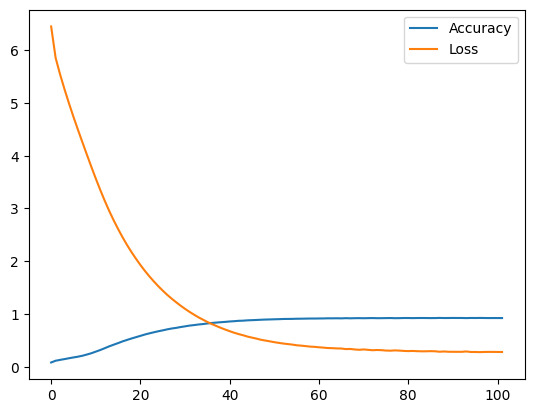

In [17]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**2-Bidirectional LSTM**

In [18]:
Bidirectional_LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [19]:
Bidirectional_LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [20]:
with tf.device('gpu'):
    history = Bidirectional_LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1639/1639 [==============================] - 39s 22ms/step - loss: 6.4106 - accuracy: 0.0845
Epoch 2/150
1639/1639 [==============================] - 36s 22ms/step - loss: 5.7894 - accuracy: 0.1173
Epoch 3/150
1639/1639 [==============================] - 36s 22ms/step - loss: 5.4446 - accuracy: 0.1330
Epoch 4/150
1639/1639 [==============================] - 36s 22ms/step - loss: 5.1219 - accuracy: 0.1504
Epoch 5/150
1639/1639 [==============================] - 38s 23ms/step - loss: 4.8127 - accuracy: 0.1674
Epoch 6/150
1639/1639 [==============================] - 38s 23ms/step - loss: 4.5172 - accuracy: 0.1846
Epoch 7/150
1639/1639 [==============================] - 35s 21ms/step - loss: 4.2312 - accuracy: 0.2055
Epoch 8/150
1639/1639 [==============================] - 35s 21ms/step - loss: 3.9459 - accuracy: 0.2325
Epoch 9/150
1639/1639 [==============================] - 37s 23ms/step - loss: 3.6624 - accuracy: 0.2686
Epoch 10/150
1639/1639 [==============================]

In [21]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

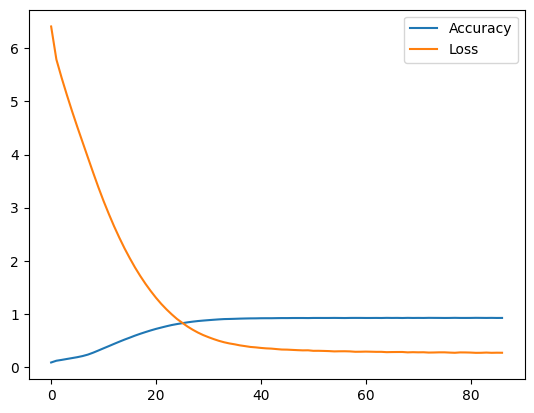

In [22]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**3-GRU**

In [23]:
GRU = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.GRU(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [24]:
GRU.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [25]:
with tf.device('gpu'):
    history = GRU.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1639/1639 [==============================] - 30s 17ms/step - loss: 6.3774 - accuracy: 0.0914
Epoch 2/150
1639/1639 [==============================] - 27s 17ms/step - loss: 5.6669 - accuracy: 0.1257
Epoch 3/150
1639/1639 [==============================] - 27s 17ms/step - loss: 5.2745 - accuracy: 0.1459
Epoch 4/150
1639/1639 [==============================] - 27s 17ms/step - loss: 4.8997 - accuracy: 0.1652
Epoch 5/150
1639/1639 [==============================] - 27s 17ms/step - loss: 4.5292 - accuracy: 0.1869
Epoch 6/150
1639/1639 [==============================] - 27s 17ms/step - loss: 4.1725 - accuracy: 0.2123
Epoch 7/150
1639/1639 [==============================] - 27s 17ms/step - loss: 3.8368 - accuracy: 0.2469
Epoch 8/150
1639/1639 [==============================] - 27s 17ms/step - loss: 3.5188 - accuracy: 0.2913
Epoch 9/150
1639/1639 [==============================] - 27s 17ms/step - loss: 3.2197 - accuracy: 0.3370
Epoch 10/150
1639/1639 [==============================]

In [26]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

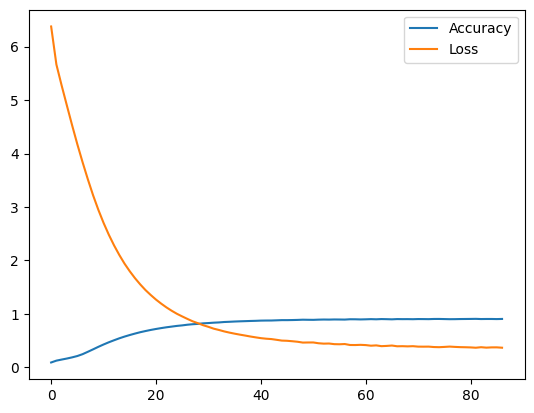

In [27]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

# Testing The Model

**1-LSTM**

In [28]:
text = "The officer looked"
number_of_words = 10
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

The officer looked at
The officer looked at my
The officer looked at my throat
The officer looked at my throat and
The officer looked at my throat and replied
The officer looked at my throat and replied and
The officer looked at my throat and replied and as
The officer looked at my throat and replied and as hungry
The officer looked at my throat and replied and as hungry as
The officer looked at my throat and replied and as hungry as a
 
Full Generated Text: The officer looked at my throat and replied and as hungry as a


**2-Bidirectional LSTM**

In [29]:
text = "The officer looked"
number_of_words = 12
  
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = Bidirectional_LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word
    print(text)
print(" ")
print("Full Generated Text:", text) 

The officer looked at
The officer looked at my
The officer looked at my throat
The officer looked at my throat and
The officer looked at my throat and replied
The officer looked at my throat and replied is
The officer looked at my throat and replied is the
The officer looked at my throat and replied is the grim
The officer looked at my throat and replied is the grim old
The officer looked at my throat and replied is the grim old voice
The officer looked at my throat and replied is the grim old voice or
The officer looked at my throat and replied is the grim old voice or full
 
Full Generated Text: The officer looked at my throat and replied is the grim old voice or full


**3-GRU**

In [30]:
text = "The officer looked"
number_of_words = 12
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = GRU.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

The officer looked at
The officer looked at my
The officer looked at my throat
The officer looked at my throat and
The officer looked at my throat and replied
The officer looked at my throat and replied was
The officer looked at my throat and replied was a
The officer looked at my throat and replied was a very
The officer looked at my throat and replied was a very away
The officer looked at my throat and replied was a very away dreams
The officer looked at my throat and replied was a very away dreams a
The officer looked at my throat and replied was a very away dreams a gateway
 
Full Generated Text: The officer looked at my throat and replied was a very away dreams a gateway


# Save The Models

In [31]:
LSTM.save('English_LSTM.h5')

In [32]:
Bidirectional_LSTM.save('English_Bidirectional_LSTM.h5')

In [33]:
GRU.save('English_GRU.h5')

# Save The Tokenizer

In [34]:
import pickle
with open('english_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)